In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.fft import fft, fftfreq 
from scipy import fft
import scipy.io
from scipy import signal

from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score



(5, 10000)
(10000,)


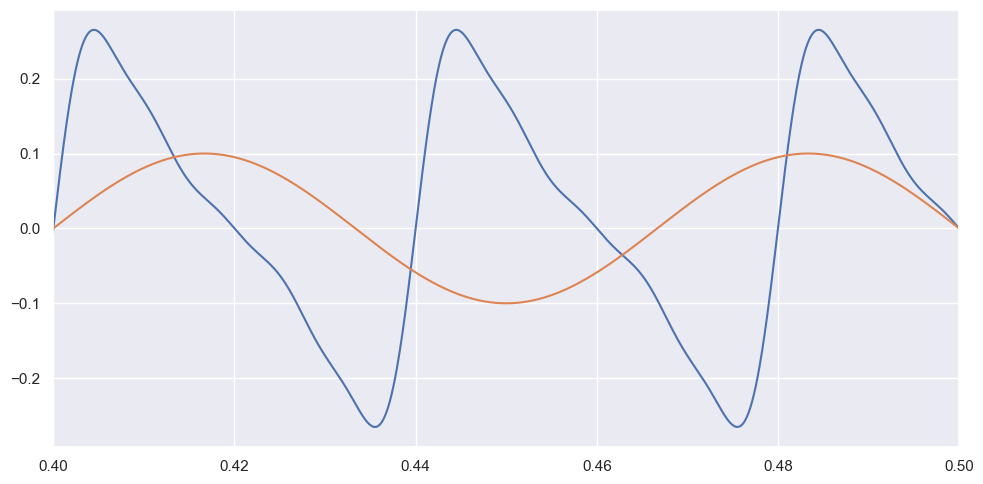

In [22]:
fs = 10000
f0 = 25
n = 8
d = 0.02
p = 0.12

t = np.linspace(0,1,fs)
zz = np.sin(2*np.pi*f0*np.array([1 ,2 ,3 ,4 ,5]).reshape(5,1)*t)/5
print(np.shape(zz))
z = np.matmul(np.array([1,0.5, 0.2, 0.1, 0.05]).reshape(1,5),zz)
z = z[0]
print(np.shape(z))
ss = np.sin(2*np.pi*15*np.array([1 ,2 ,3 ,4 ,5]).reshape(5,1)*t)
ss = (ss[0]*0.1)

sns.set(rc= {"figure.figsize": (10,5)})
fig, ax = plt.subplots()
ax.plot(t,z)
ax.plot(t,ss)
plt.xlim(0.4,0.5)
fig.tight_layout()

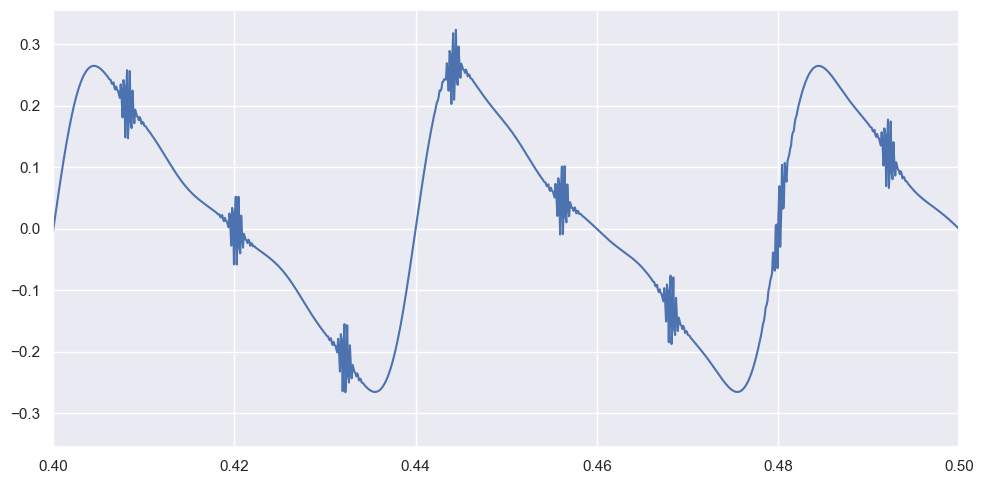

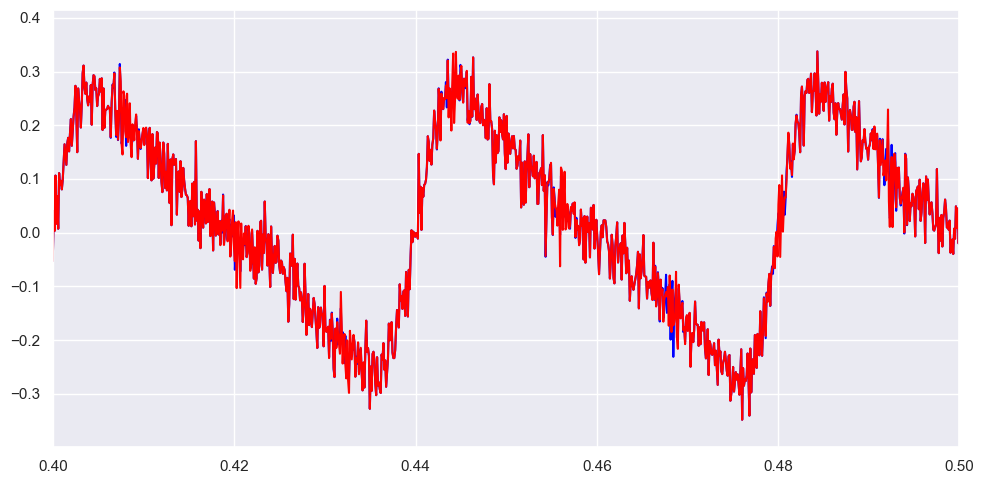

In [23]:
from scipy.signal import windows
from scipy.signal import convolve
ca = 0
bpfo = n*f0/2*(1-d/p*np.cos(ca))
fImpact = 3000
tImpact = np.linspace(0,5*10.0**(-3),50)
window = windows.flattop(len(tImpact))
xImpact = np.sin(2*np.pi*fImpact*tImpact)*window/5
#xImpact = np.array(xImpact).reshape(1,len(xImpact))
XComb = np.zeros((1,len(t)))
XComb = XComb[0]
XComb[1:len(XComb):120]=1
x = convolve(XComb,xImpact,mode="same")/3
x = x+z

fig, ax = plt.subplots()
ax.plot(t,x)
plt.xlim(0.4,0.5)
fig.tight_layout()


sigma = 30
n1 = np.random.normal(0,1,size= len(x))/sigma
n2 = np.random.normal(0,1,size= len(x))/sigma
good = n1+z
bad = n1+x

fig, ax = plt.subplots()
ax.plot(t,good,color="blue")
ax.plot(t,bad, color= "red")
plt.xlim(0.4,0.5)
fig.tight_layout()

[ 0.4    0.33   0.25   0.2    0.15  -0.4   -0.33  -0.25  -0.2   -0.15
  0.4    0.33   0.25   0.2    0.15  -0.1   -0.25  -0.4   -0.155 -0.3
  0.4    0.33   0.25   0.2    0.15  -0.4   -0.33  -0.25  -0.2   -0.15
  0.4    0.33   0.25   0.2    0.15  -0.1   -0.25  -0.4   -0.155 -0.3
  0.4    0.33   0.25   0.2    0.15  -0.4   -0.33  -0.25  -0.2   -0.15
  0.4    0.33   0.25   0.2    0.15  -0.1   -0.25  -0.4   -0.155 -0.3  ]


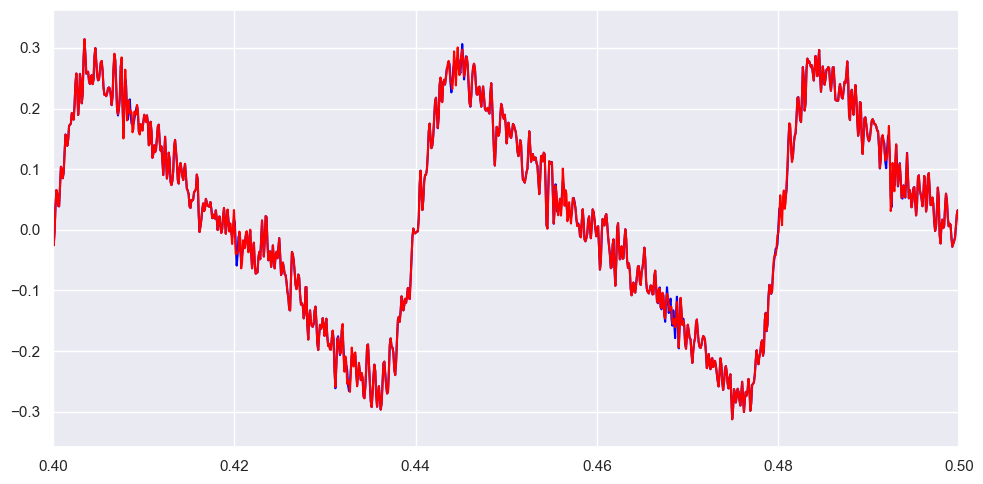

In [24]:
fr = 10000
nfil = 3
sos = signal.butter(nfil,[fr*1/4], btype="low",fs= fr,output="sos")
sfgood = signal.sosfilt(sos,good)
sfbad = signal.sosfilt(sos,bad)

fig, ax = plt.subplots()
ax.plot(t,sfgood,color="blue")
ax.plot(t,sfbad, color= "red")
plt.xlim(0.4,0.5)
fig.tight_layout()

tt = t[4000:5000]
bb = bad[4000:5000]
gg = good[4000:5000]
nn = np.array([0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3,
               0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3,
               0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3])
zeroarr = np.zeros(len(bb))
array_true = np.zeros(len(bb))
for i in range(0,len(nn)):
    zeroarr[i*16] = nn[i]
for i in range(0,len(zeroarr)):
    if zeroarr[i] == 0:
        array_true[i] = 0
    else:
        array_true[i]= 1 
b2 = zeroarr+bb
print(nn)

In [25]:
import scipy.io
def getData(s,ss):
    mat = []
    for i in range(1,21):  
        m = scipy.io.loadmat(s +ss + str(i) +  ".mat")
        mat.append(m)
    X = []
    Y = []
    I = []
    for i in range(0,20):
        M = mat[i]
        dd = ss + str(i+1)
        M = M [dd]
        X.append(M["X"][0][0]["Data"][0])
        Y.append(M["Y"][0][0]["Data"][0])
        

    XData = np.arange(0)
    YData = np.arange(0)
    IData = np.arange(0)

    for i in range(0,20):
        XData = np.append(XData,X[i][1][0])
        YData = np.append(YData, Y[i][6][0])
    return [XData,YData]

def getSample(s,ss):
    m = scipy.io.loadmat(s+ss+".mat")
    M = m[ss]
    X = np.arange(0)
    Y = np.arange(0)
    X = np.append(X,M["X"][0][0]["Data"][0][1][0])
    Y = np.append(Y,M["Y"][0][0]["Data"][0][6][0])
    return [X,Y]

def getSampleI(s,ss):
    m = scipy.io.loadmat(s+ss+".mat")
    M = m[ss]
    X = np.arange(0)
    Y = np.arange(0)
    I = np.arange(0)
    X = np.append(X,M["X"][0][0]["Data"][0][1][0])
    Y = np.append(Y,M["Y"][0][0]["Data"][0][6][0])
    I = np.append(I,M[0][0][2][0][1][2][0])
    return [X,Y,I]
    
#YData4 = fft(YData4)
N = 1000
T = 1.0 / 400.0
lx = fftfreq(N, T)[:N//2]
X1,Y1 = getSample("bearing/K005/","N15_M07_F10_K005_1")
X2,Y2 = getSample("bearing/KA05/","N15_M07_F10_KA05_1")
X3,Y3 = getSample("bearing/KI05/","N15_M07_F10_KI05_1")
X4,Y4 = getSample("bearing/KB27/","N15_M07_F10_KB27_1")

X1 = X1[0:256000]
X1 = np.linspace(0,4,256000)
Y1 = Y1[0:256000]
Y2 = Y2[0:256000]
Y3 = Y3[0:256000]
Y4 = Y4[0:256000]

XData1, YData1 = getData("bearing/K005/","N15_M07_F10_K005_")
XData2, YData2 = getData("bearing/KA05/","N15_M07_F10_KA05_")
XData3, YData3 = getData("bearing/KI05/","N15_M07_F10_KI05_")    
XData4, YData4 = getData("bearing/KB27/","N15_M07_F10_KB27_") 
lx = np.linspace(0,80, 5120000)
XData1 = XData1[0:len(lx)]
YData1 = YData1[0:len(lx)]
YData2 = YData2[0:len(lx)]
YData3 = YData3[0:len(lx)]
YData4 = YData4[0:len(lx)]


array([[<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'broken'}>]], dtype=object)

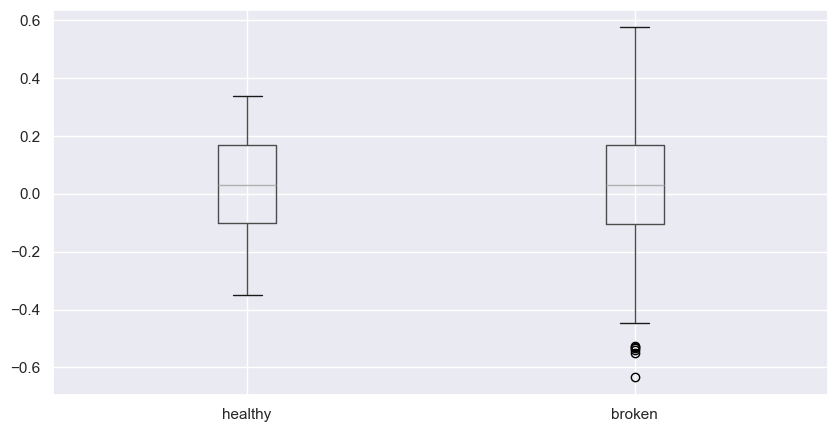

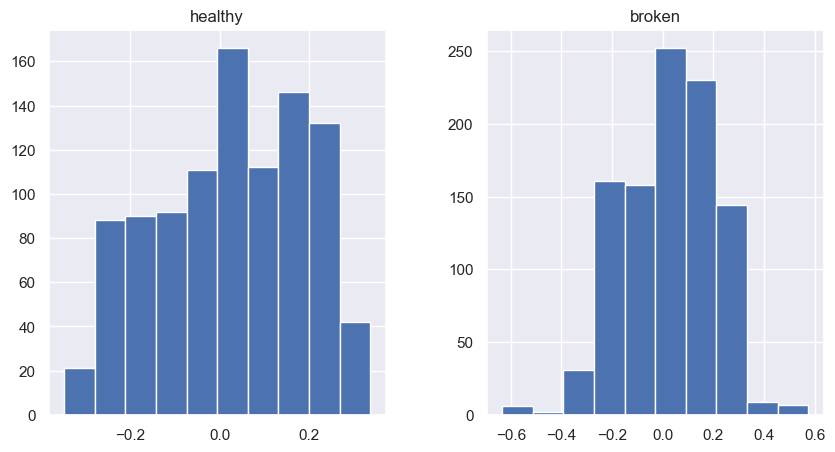

In [26]:
time = pd.to_datetime(tt,unit="s")
#ttime = pd.to_timedelta(tt,unit="milliseconds")
#ttime.to_pytimedelta()
df = pd.DataFrame(index=time, data = {"healthy": gg,"broken":b2})
df.head()
s = validate_series(df)

df.boxplot()
df.hist()


In [27]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from adtk import detector

my_dec = detector

def calcRocC(my_dec,c=20):
    
        
    curve_tpr = np.zeros(0)
    curve_fpr = np.zeros(0)
    curve_tresh = np.zeros(0)
    anomalies = np.zeros(0)
    c_array = np.linspace(0,3,c)
    for i in range(0,c):
        
        ad = my_dec(c=c_array[i])
        anomalies = ad.fit_detect(s)
        fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:,1],False))
        curve_tpr = np.append(curve_tpr,tpr)
        curve_fpr= np.append(curve_fpr,fpr)
        curve_tresh = np.append(curve_tresh,tresh)

    zz = list(zip(curve_tpr,curve_fpr))
    s_zz = sorted(zz,key = lambda x:x[1])
    curve_tpr,curve_fpr = zip(*s_zz)


    return curve_fpr,curve_tpr,curve_tresh

def calcRocW(my_dec,c=20,w=50):
    
        
    curve_tpr = np.zeros(0)
    curve_fpr = np.zeros(0)
    curve_tresh = np.zeros(0)
    anomalies = np.zeros(0)
    c_array = np.linspace(0,3,c)
    for i in range(0,c):
        
        ad = my_dec(c=c_array[i],window=w)
        anomalies = ad.fit_detect(s)
        fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:,1],False))
        curve_tpr = np.append(curve_tpr,tpr)
        curve_fpr= np.append(curve_fpr,fpr)
        curve_tresh = np.append(curve_tresh,tresh)

    zz = list(zip(curve_tpr,curve_fpr))
    s_zz = sorted(zz,key = lambda x:x[1])
    curve_tpr,curve_fpr = zip(*s_zz)


    return curve_fpr,curve_tpr,curve_tresh

def calcRocTresh(my_dec,c=20):
    
        
    curve_tpr = np.zeros(0)
    curve_fpr = np.zeros(0)
    curve_tresh = np.zeros(0)
    anomalies = np.zeros(0)
    c_array = np.linspace(0,3,c)
    for i in range(0,c):
        
        ad = my_dec(high=c_array[i],low=-c_array[i])
        anomalies = ad.detect(s)
        
        fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:,1],False))
        curve_tpr = np.append(curve_tpr,tpr)
        curve_fpr= np.append(curve_fpr,fpr)
        curve_tresh = np.append(curve_tresh,tresh)

    zz = list(zip(curve_tpr,curve_fpr))
    s_zz = sorted(zz,key = lambda x:x[1])
    curve_tpr,curve_fpr = zip(*s_zz)


    return curve_fpr,curve_tpr,curve_tresh

def calcRocQuantile(my_dec,c=20):
    
        
    curve_tpr = np.zeros(0)
    curve_fpr = np.zeros(0)
    curve_tresh = np.zeros(0)
    anomalies = np.zeros(0)
    c_array = np.linspace(0,1,c)
    for i in range(0,c):
        
        ad = my_dec(high=c_array[i],low=0.01)
        anomalies = ad.fit_detect(s)
        
        fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:,1],False))
        curve_tpr = np.append(curve_tpr,tpr)
        curve_fpr= np.append(curve_fpr,fpr)
        curve_tresh = np.append(curve_tresh,tresh)

    zz = list(zip(curve_tpr,curve_fpr))
    s_zz = sorted(zz,key = lambda x:x[1])
    curve_tpr,curve_fpr = zip(*s_zz)


    return curve_fpr,curve_tpr,curve_tresh

def calcRocGen(my_dec,c=20):
    
        
    curve_tpr = np.zeros(0)
    curve_fpr = np.zeros(0)
    curve_tresh = np.zeros(0)
    anomalies = np.zeros(0)
    c_array = np.linspace(0,6,c)
    for i in range(0,c):
        
        ad = my_dec(alpha = c_array[i])
        anomalies = ad.fit_detect(s)
        
        fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:,1],False))
        curve_tpr = np.append(curve_tpr,tpr)
        curve_fpr= np.append(curve_fpr,fpr)
        curve_tresh = np.append(curve_tresh,tresh)

    zz = list(zip(curve_tpr,curve_fpr))
    s_zz = sorted(zz,key = lambda x:x[1])
    curve_tpr,curve_fpr = zip(*s_zz)


    return curve_fpr,curve_tpr,curve_tresh

def myplot(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:,0]
    ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    bb = np.empty(0)
    bt = np.empty(0)
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
        if (ano2[i]==True):
            bb =np.append(bb,dataB[i])
            bt = np.append(bt,tt[i])
    
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="Gesund",zorder=1)
    ax2.plot(tt,data["broken"],marker=".",color= "orange",label="Beschädigt",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/$s^2$]")
    ax1.set_xlabel("Zeit in [s]")
    ax2.set_ylabel("Beschleunigung in [m/$s^2$]")
    ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    ax2.legend()
    plt.show()

def myplotmulti(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:]
    #ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    #dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    #bb = np.empty(0)
    #bt = np.empty(0)
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
        #if (ano2[i]==True):
         #   bb =np.append(bb,dataB[i])
          #  bt = np.append(bt,tt[i])
    
    fig, (ax1) = plt.subplots(nrows=1,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="gesund",zorder=1)
    ax1.plot(tt,data["broken"],marker=".",color= "orange",label="beschädigt",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    #ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/s^2]")
    ax1.set_xlabel("Zeit in [s]")
    #ax2.set_ylabel("Beschleunigung in [m/s^2]")
    #ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    #ax2.legend()
    plt.show()


def calcMetric(array_true, array_pred,ff=False):
    tt = np.zeros(len(array_pred))
    for i in range(0,len(array_pred)):
        if array_pred[i]== True:
            tt[i] = True
        else:
            tt[i]= False
    array_pred = tt
    if ff == True:
        print("Accuracy score   = "  ,accuracy_score(array_true, array_pred))
        print("Precision score  = "  ,precision_score(array_true, array_pred))
        print("Recall score     = "  ,recall_score(array_true, array_pred))
        print("F1 score         = "  ,f1_score(array_true, array_pred))
        print("Cohens score     = "  ,cohen_kappa_score(array_true, array_pred))
    return array_pred





   

1000 1000


C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:146: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:147: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb =np.append(bb,dataB[i])
C:\Users\Poldy\AppData\L

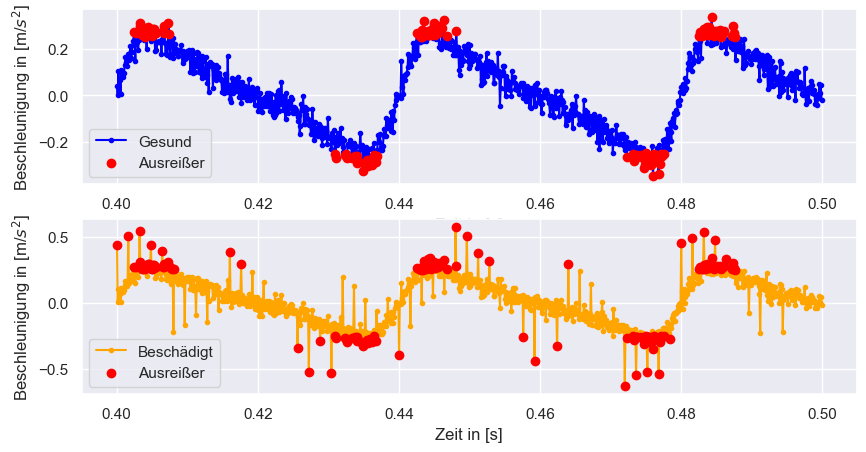

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [28]:
from adtk.detector import ThresholdAD

threshold_ad = ThresholdAD(high=0.25, low=-0.25)
anomalies = threshold_ad.detect(s)
myplot(tt,s,anomalies)
array_pred1 = calcMetric(array_true,anomalies.iloc[0:,1])

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:146: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:147: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb =np.append(bb,dataB[i])
C:\Users\Poldy\AppData\L

1000 1000


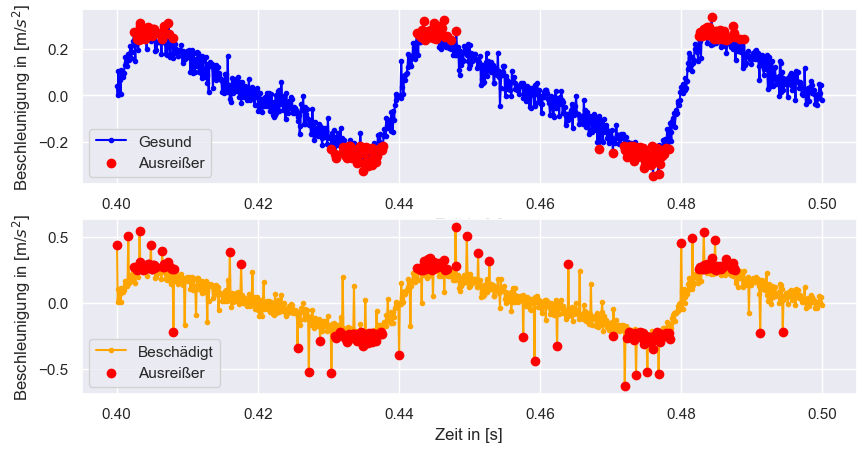

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [29]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.9, low=0.1)
anomalies = quantile_ad.fit_detect(s)

#print([0])
myplot(tt,s,anomalies)
#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
array_pred2 = calcMetric(array_true,anomalies.iloc[0:,1])



C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:146: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:147: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb =np.append(bb,dataB[i])
C:\Users\Poldy\AppData\L

1000 1000


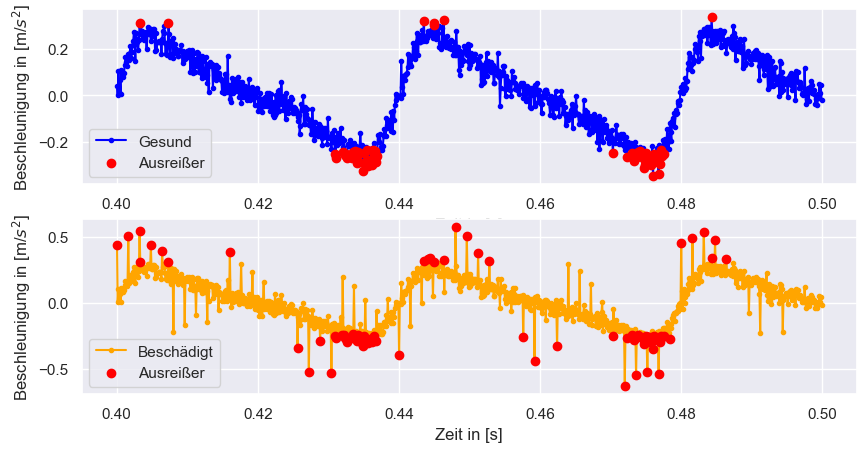

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [30]:
from adtk.detector import InterQuartileRangeAD
interquantile_ad = InterQuartileRangeAD(c=0.5)
anomalies = interquantile_ad.fit_detect(s)

myplot(tt,s,anomalies)
#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
array_pred3 = calcMetric(array_true,anomalies.iloc[0:,1])

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano1[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:146: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ano2[i]==True):
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:147: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bb =np.append(bb,dataB[i])


1000 1000


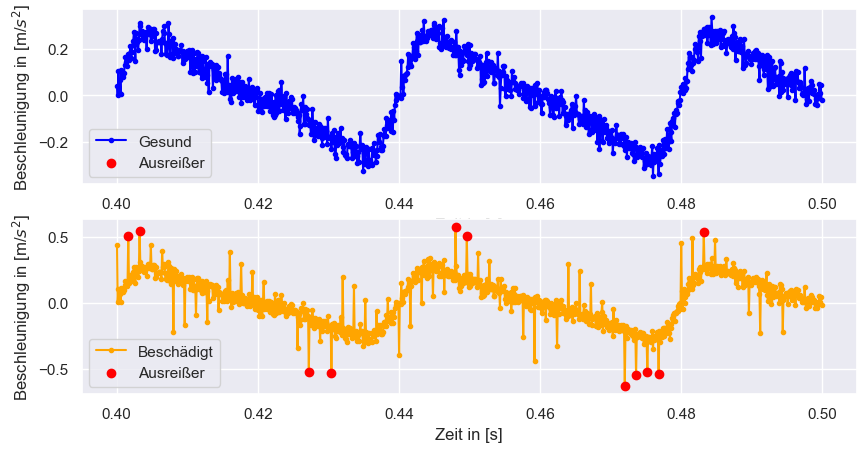

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [31]:
from adtk.detector import GeneralizedESDTestAD

esd_ad = GeneralizedESDTestAD(alpha=5)
anomalies = esd_ad.fit_detect(s)

myplot(tt,s,anomalies)
#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
array_pred4 = calcMetric(array_true,anomalies.iloc[0:,1])

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

1000 1000


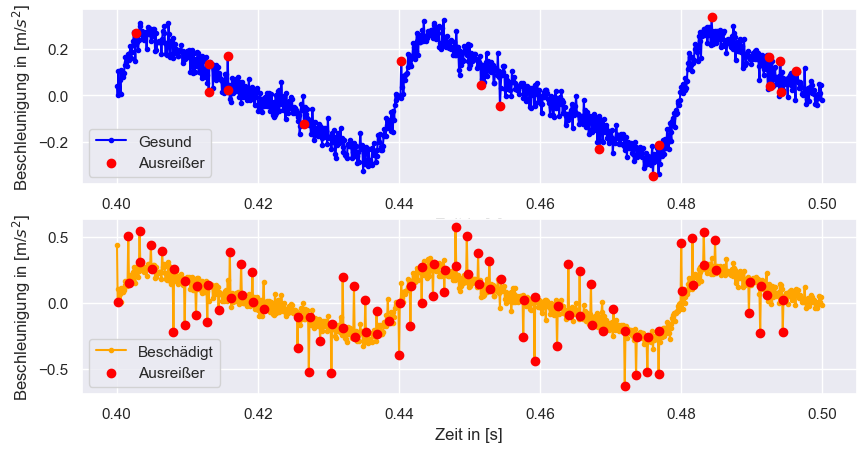

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [32]:
from adtk.detector import PersistAD


#anomalies["healthy"]=np.nan_to_num(anomalies["healthy"],nan=0.0)
#anomalies["broken"]=np.nan_to_num(anomalies["broken"],nan=0.0)
persist_ad = PersistAD(c=1.5)
anomalies = persist_ad.fit_detect(s)
myplot(tt,s,anomalies)
#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
array_pred5 =calcMetric(array_true,anomalies.iloc[0:,1])

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

1000 1000


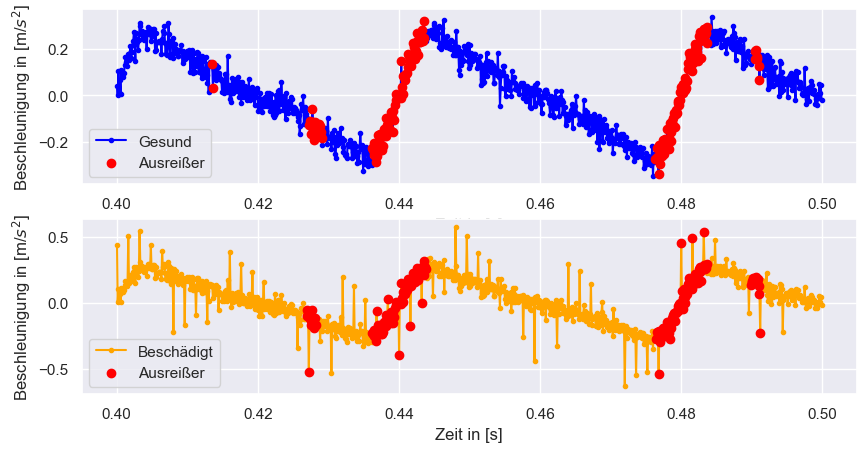

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [33]:
from adtk.detector import LevelShiftAD

level_shift_ad = LevelShiftAD(c=0.25, window=50)
anomalies = level_shift_ad.fit_detect(s)

myplot(tt,s,anomalies)
#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
array_pred6= calcMetric(array_true,anomalies.iloc[0:,1])



c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

1000 1000


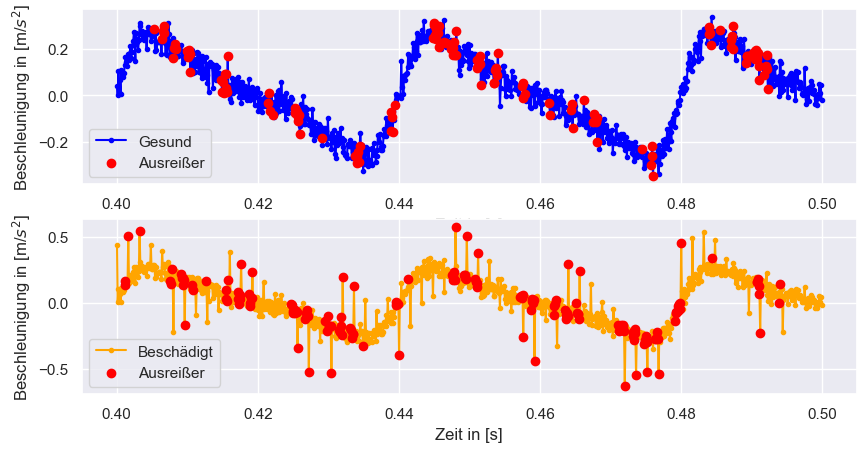

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [34]:

from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=0.5, side='both', window=10)
anomalies = volatility_shift_ad.fit_detect(s)

myplot(tt,s,anomalies)
array_pred7= calcMetric(array_true,anomalies.iloc[0:,1])


In [35]:

from adtk.detector import SeasonalAD

seasonal_ad = SeasonalAD(c=3)
anomalies = seasonal_ad.fit_detect(s)

#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")



myplot(tt,s,anomalies)
array_pred8= calcMetric(array_true,anomalies.iloc[0:,1])



RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

1000 1000


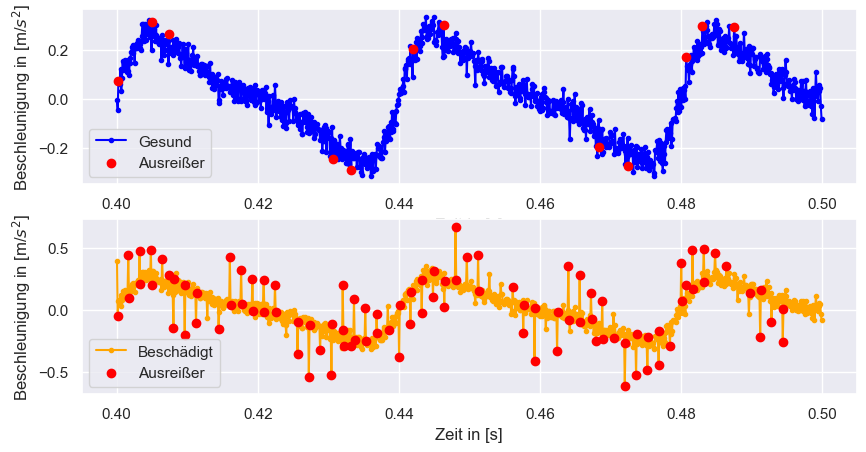

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


In [ ]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(c=1.5)
anomalies = autoregression_ad.fit_detect(s)

#print(x_auto)
myplot(tt,s,anomalies)
#plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2)
array_pred9 =calcMetric(array_true,anomalies.iloc[0:,1])

C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Local\Temp\ipykernel_16680\1950005170.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\A

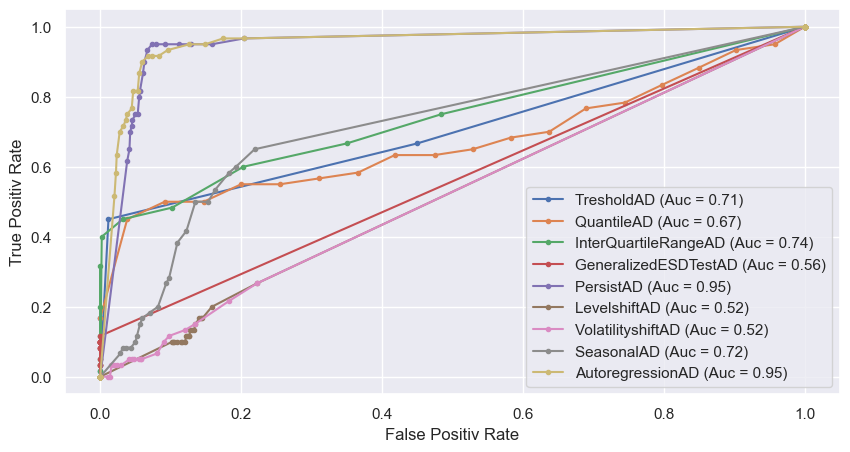

In [ ]:
fpr1, tpr1, tresh1 = calcRocTresh(ThresholdAD)
fpr2, tpr2, tresh2 = calcRocQuantile(QuantileAD)
fpr3, tpr3, tresh3 = calcRocC(InterQuartileRangeAD)
fpr4, tpr4, tresh4 = calcRocGen(GeneralizedESDTestAD)
fpr5, tpr5, tresh5 = calcRocC(PersistAD)
fpr6, tpr6, tresh6 = calcRocW(LevelShiftAD)
fpr7, tpr7, tresh7 = calcRocW(VolatilityShiftAD)
fpr8, tpr8, tresh8 = calcRocW(VolatilityShiftAD,w=10)#calcRocC(SeasonalAD)
fpr9, tpr9, tresh9 = calcRocC(AutoregressionAD)
#fpr10, tpr10, tresh10 = calcRoc()

fig, ax = plt.subplots()
ax.plot(fpr1,tpr1,marker=".",label="TresholdAD (Auc = "+ str(round(np.trapz(y=tpr1,x=fpr1),2))+")")
ax.plot(fpr2,tpr2,marker=".",label="QuantileAD (Auc = "+ str(round(np.trapz(y=tpr2,x=fpr2),2))+")")
ax.plot(fpr3,tpr3,marker=".",label="InterQuartileRangeAD (Auc = "+ str(round(np.trapz(y=tpr3,x=fpr3),2))+")")
ax.plot(fpr4,tpr4,marker=".",label="GeneralizedESDTestAD (Auc = "+ str(round(np.trapz(y=tpr4,x=fpr4),2))+")")
ax.plot(fpr5,tpr5,marker=".",label="PersistAD (Auc = "+ str(round(np.trapz(y=tpr5,x=fpr5),2))+")")
ax.plot(fpr6,tpr6,marker=".",label="LevelshiftAD (Auc = "+ str(round(np.trapz(y=tpr6,x=fpr6),2))+")")
ax.plot(fpr7,tpr7,marker=".",label="VolatilityshiftAD (Auc = "+ str(round(np.trapz(y=tpr7,x=fpr7),2))+")")
ax.plot(fpr8,tpr8,marker=".",label="SeasonalAD (Auc = "+ str(round(np.trapz(y=tpr8,x=fpr8),2))+")")
ax.plot(fpr9,tpr9,marker=".",label="AutoregressionAD (Auc = "+ str(round(np.trapz(y=tpr9,x=fpr9),2))+")")
ax.legend()
ax.set_xlabel("False Positiv Rate")
ax.set_ylabel("True Positiv Rate")
plt.show()


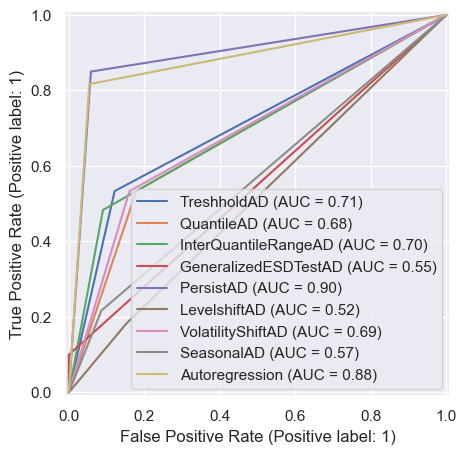

In [ ]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(array_true,array_pred1, ax=ax,name="TreshholdAD")
RocCurveDisplay.from_predictions(array_true,array_pred2, ax=ax, name="QuantileAD")
RocCurveDisplay.from_predictions(array_true,array_pred3, ax=ax, name= "InterQuantileRangeAD")
RocCurveDisplay.from_predictions(array_true,array_pred4, ax=ax, name= "GeneralizedESDTestAD")
RocCurveDisplay.from_predictions(array_true,array_pred5, ax=ax, name= "PersistAD")
RocCurveDisplay.from_predictions(array_true,array_pred6, ax=ax, name= "LevelshiftAD")
RocCurveDisplay.from_predictions(array_true,array_pred7, ax=ax, name= "VolatilityShiftAD")
RocCurveDisplay.from_predictions(array_true,array_pred8, ax=ax, name= "SeasonalAD")
RocCurveDisplay.from_predictions(array_true,array_pred9, ax=ax, name= "Autoregression")

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
#x_auto= np.array(x_auto)
#print(x_auto)
#ConfusionMatrixDisplay.from_predictions(y_true= array_true, y_pred=x_pred,cmap=plt.cm.Blues)

plt.show()

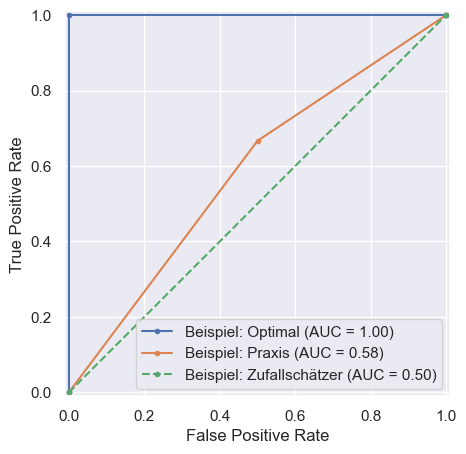

In [ ]:

import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
pred1 = np.array([0,0,1,1,1])
pred2 = np.array([1,0,0,1,1])
fpr1, tpr1, thresholds1 = metrics.roc_curve(y, pred1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y, pred2)
pred3 = np.array([1,1,1,1,1])
fpr3, tpr3, thresholds3 = metrics.roc_curve(y, pred3)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
sns.set(rc= {"figure.figsize": (10,5)})
fig, (ax1) = plt.subplots(nrows=1,ncols=1)
display1 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1,
                                  estimator_name='Beispiel: Optimal')
display2 = metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2,
                                  estimator_name='Beispiel: Praxis')
display3 = metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3,
                                  estimator_name="Beispiel: Zufallschätzer")
display1.plot(ax=ax1,marker=".")
display2.plot(ax=ax1,marker=".")
display3.plot(ax=ax1,marker=".",linestyle="--")
plt.show()